# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Section: Wednesday 12:45
- Student Name: Shreeya Behera
- Name.#: behera.18@osu.edu
***

# Introduction

### Objectives

In this lab, you will use the "Cleveland Data CLEANED AND TRIMMED.csv" heart disease dataset provided on Carmen.  It is a subset of the "Cleveland" dataset that can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

You will configure, execute, and evaluate an off-the-shelf K-Nearest-Neighbor classifier and two other classifiers you choose.

The objectives of this assignment are:
1.	Understand how to evaluate classifiers based on business criteria.
2.	Understand how to tune and evaluate a classifier to achieve good performance.
3.	Understand how to select and evaluate suitable off-the-shelf classifiers based on the characteristics of a dataset and the outcomes you need.

### Problem Statement

You work for a medical institution that wants to improve the heart health of its patients.  You have obtained a dataset that contains a variety of demographic and health-related information for a group of patients.  It also includes a CLASS variable "num" that indicates the heart health of each of the patients.  The values are:

0. No heart health issues / risk
1. Slight heart health issues / risk
2. Moderate heart health issues / risk
3. High heart health issues / risk
4. Extreme heart health issue / risk

You have been asked to develop a classifier based on the dataset data, to predict the CLASS of new patients so they can be enrolled in interventions based on their demographic data.

The COSTs of the interventions are as follows, based on the predicted class of each patient

0) Tiny intervention: 100 (dollars)
1) Minor intervention: 200
2) Moderate intervention: 300
3) Significant intervention: 400
4) Extreme intervention: 500

The BENEFITs of the interventions are as follows:

- If the classification is correct and the correct intervention given to the patient: 500 * (TRUE_CLASS + 1)
- If an incorrect classification is made and the wrong intervention is given to the patient: 0

You would like to find a classifier that maximizes the overall **NET_BENEFIT = BENEFIT - COST**. Therefore, a larger positive number is a good outcome.

So, for example:

- If a patient's true class is 4 and their predicted class is 0, their NET_BENEFIT = 0 - 100 = -100
- If a patient's true class is 4 and they are correctly classified, their NET_BENEFIT is 500*(4+1) - 500 = 2000

The medical institution would like you to evaluate the use of a K-Nearest-Neighbor classifier as a starting point.  You agree to do so, as long as you then can choose a different classifier if you are not satisfied with KNN.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.

### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (5%)
> - Is it well organized and does the presentation flow in a logical manner?
> - Are there no grammar and spelling mistakes?
> - Do the charts/graphs relate to the text?
> - Are the summarized key points and findings understandable by non-experts?
> - Do the Overview and Conclusions provide context for the entire exercise?
2.	Evaluation Method (10%)
> - Does your evaluation method meet the needs of the developer (you) as well as the needs of your business stakeholders?
> - Is the evaluation method sound?
> - Did you describe both the method itself and why you chose it?
3.	Pre-Processing of the Dataset (10%)
> - Did you make reasonable choices for pre-processing, and explain why you made them?
4.	Evaluation of the KNN Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
5.	Evaluation of the Second Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
6.	Evaluation of the Third Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
7.	Comparison of the Three Classifiers (10%)
> - Is the comparison sound?
> - Did you choose a specific classifier as best and explain why?
8.  Conclusions (5%)
> - Did you summarize appropriately your critical findings. 
> - Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	HW2_Surname_DotNumber.zip

The submitted file should be less than 10MB.

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

#Source: Classification models for heart disease prediction using feature selection and PCA

In the past 10-15 years, Heart disease has become one of the leading cause of death in the world. 
The growth in medical data collection presents a new opportunity for physicians to improve patient diagnosis. In recent years, practitioners have increased their usage of computer technologies to improve decision-making support. In the health care industry, machine learning is becoming an important solution to aid the diagnosis of patients. Several data mining techniques can be used to help health care professionals in the diagnosis of heart disease. Prediction should be made to decrease the risk of heart disease.

We used features such as cholesterol, max heart rate, and fasting blood sugar to predict the severity of heart diseases. We used a custom made evaluation metric to predict the most efficient model out of the three models I used (KNN, Logistic Regression, and Random Forest)

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
sns.set_theme(style="whitegrid")

np.random.seed(47)

import warnings
warnings.filterwarnings('ignore')

***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
- Consider using: from sklearn.metrics import classification_report, confusion_matrix
***

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Accuracy is one metric for evaluating classification models.

Accuracy $=\frac{\text { Number of correct predictions }}{\text { Total number of predictions }}$
For binary classification, accuracy can also be calculated in terms of positives and negatives as follows:
$$
\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}
$$

Where $T P=$ True Positives, $T N=$ True Negatives, $F P=$ False Positives, and $F N=$ False Negatives.

The confusion matrix is a table that is used in classification problems to assess where errors in the model were made.

The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
- Consider creating a function that takes a confusion matrix and calculates the cost, like this:
***

In [46]:
# def calculate_cost(conf_matrix):
# # Fill in the cost matrix values
# #                           PREDICTED VALUES
# #                      0     1     2     3     4
#     cost_matrix = [[1234, 1234, 1234, 1234, 1234],   # 0
#                    [1234, 1234, 1234, 1234, 1234],   # 1
#                    [1234, 1234, 1234, 1234, 1234],   # 2  TRUE VALUES
#                    [1234, 1234, 1234, 1234, 1234],   # 3
#                    [1234, 1234, 1234, 1234, 1234]]   # 4
#     total = 0
#     for r in range(0, 5):
#         for c in range(0, 5):
#             total = total + cost_matrix[r][c] * conf_matrix[r][c]

# # OR... THIS WORKS      total = np.dot(np.array(conf_matrix).ravel(), np.array(cost_matrix).ravel())
#     return total

def calculate_cost(conf_matrix):
    cost_matrix = np.zeros((5,5));
    for i in range(5):
        for j in range(5):
            if i!=j:
                cost_matrix[i][j] = -(j+1)*100;
            else:
                cost_matrix[i][j] = 500*(j+1) - (j+1)*100;

    total = 0
    for r in range(0, 5):
        for c in range(0, 5):
            total = total + cost_matrix[r][c] * conf_matrix[r][c]
    return total

     

***
# Section: 2 - Pre-Processing of the Dataset
- Use the provided dataset.  Split it into a Training dataset and a Test dataset based on the class attribute.  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing. For consistency, use the **train_test_split** operation available in SciKit Learn (use a specific random seed, so it is reproducible).
  - from sklearn.model_selection import train_test_split
  - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
***

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the website listed in the Introduction.
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

This database contains $76$ attributes, but all published experiments refer to using a subset of $14$ of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Only 14 attributes used:
1.  \# 3 (age) age: age in years
2.  \# 4 (sex) sex (1 = male; 0 = female)
3.  \# 9 (cp) chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4.  \# 10 (trestbps) resting blood pressure (in mm Hg on admission to the hospital)(normal 120/80 mmHg)
5.  \# 12 (chol) serum cholestoral in mg/dl (<130 mg/dl>)
6.  \# 16 (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.  \# 19 (restecg)  resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.  \# 32 (thalach) thalach: maximum heart rate achieved
9.  \# 38 (exang) exercise induced angina (1 = yes; 0 = no)
10.  \# 40 (oldpeak) ST depression induced by exercise relative to rest
11.  \# 41 (slope) the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12.  \# 44 (ca) number of major vessels (0-3) colored by flourosopy
13.  \# 51 (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect
14.  \# 58 (num) (the predicted attribute)  diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [47]:
data = pd.read_csv("Cleveland Data CLEANED AND TRIMMED.csv")
data = data.astype('float32')
data = data.astype({"num":"category"})
data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,2.0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,3.0,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,4.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,5.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [48]:
data.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,54.411346,0.677305,3.163121,131.563828,249.092194,0.148936,1.014184,149.765961,0.326241,1.026950,1.585106,0.595745,4.581560
std,81.550598,9.053083,0.468338,0.955405,17.757492,51.217541,0.356659,0.998117,22.923866,0.469671,1.138825,0.609700,1.236910,2.248469
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000
25%,71.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,141.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,211.750000,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000
max,282.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

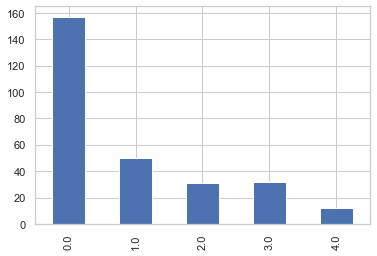

In [49]:
data.num.value_counts(sort=False).plot.bar()

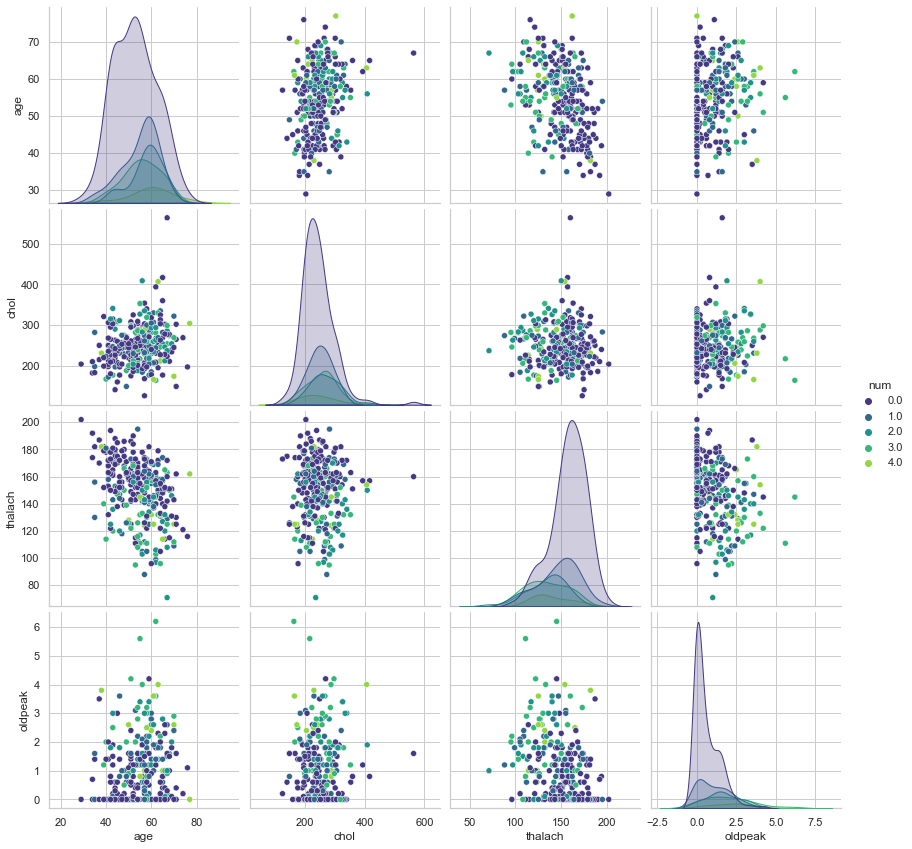

In [50]:
# Plotting sns plot with relevant features (features which do not take only few different values)

X_tt = data[["age","chol","thalach","oldpeak","num"]];
import seaborn as sns
sns.pairplot(X_tt , hue="num", height=3, palette = 'viridis')
plt.show()

In [51]:
# I plotted for all (4 choose 2) features("age","chol","thalach","oldpeak") combination to see if I find anything interesting between any two features. I could not see anything in particular.
import plotly.express as px
fig = px.scatter(data, x="thalach", y= "oldpeak", color="num", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.562
Date:                Wed, 12 Oct 2022   Prob (F-statistic):             0.0343
Time:                        17:42:52   Log-Likelihood:                -183.05
No. Observations:                 157   AIC:                             370.1
Df Residuals:                     155   BIC:                             376.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6914      0.514      3.293      0.0

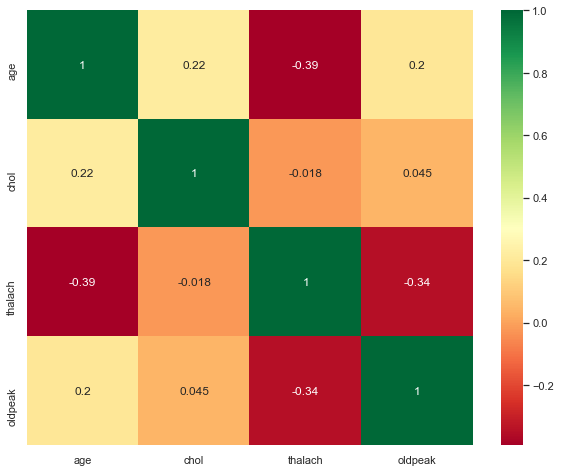

In [52]:
#Correlation matrix
sns.heatmap(X_tt.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

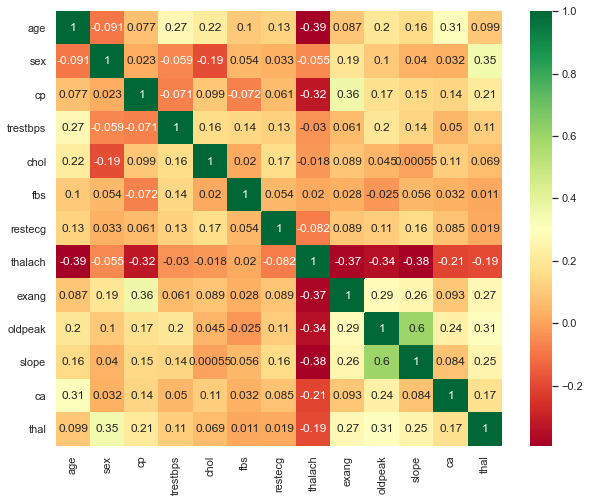

In [53]:
#Correlation matrix (for all the features)
X = data.drop(columns = ["id","num"])
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [54]:
from sklearn.feature_selection import chi2
X_new = data[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope"]] #removing CA and thal as they take negative values too.
y = data[['num']]
chi_scores = chi2(X_new,y)

p_values = pd.Series(chi_scores[1],index = X_new.columns)
p_values.sort_values(ascending = False , inplace = True)

pd.DataFrame( chi_scores[1], X_new.columns, columns=['p-value'])

,p-value
age,1.266665e-04
sex,6.158434e-02
cp,7.142631e-03
trestbps,1.216646e-03
chol,2.433421e-15
fbs,3.763417e-01
restecg,9.383508e-03
thalach,1.253370e-39
exang,1.180013e-07
oldpeak,1.151822e-17


We notice that the p_value of sex, fbs, and slope is greater that 0.05

***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

In [55]:
duplicate = data[data.duplicated(keep="first" )]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
len(duplicate)

Duplicate Rows :


0

There aren't any duplicates in this file, so we do not have to remove any row.

In [56]:
# Dropping the following features as their p-value was higher than 0.5

data = data.drop(columns=["id","sex", "restecg","slope"] )
data.head()

,age,cp,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,num
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,6.0,0.0
1,67.0,4.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,3.0,2.0
2,67.0,4.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,7.0,1.0
3,37.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,3.0,0.0
4,41.0,2.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,3.0,0.0


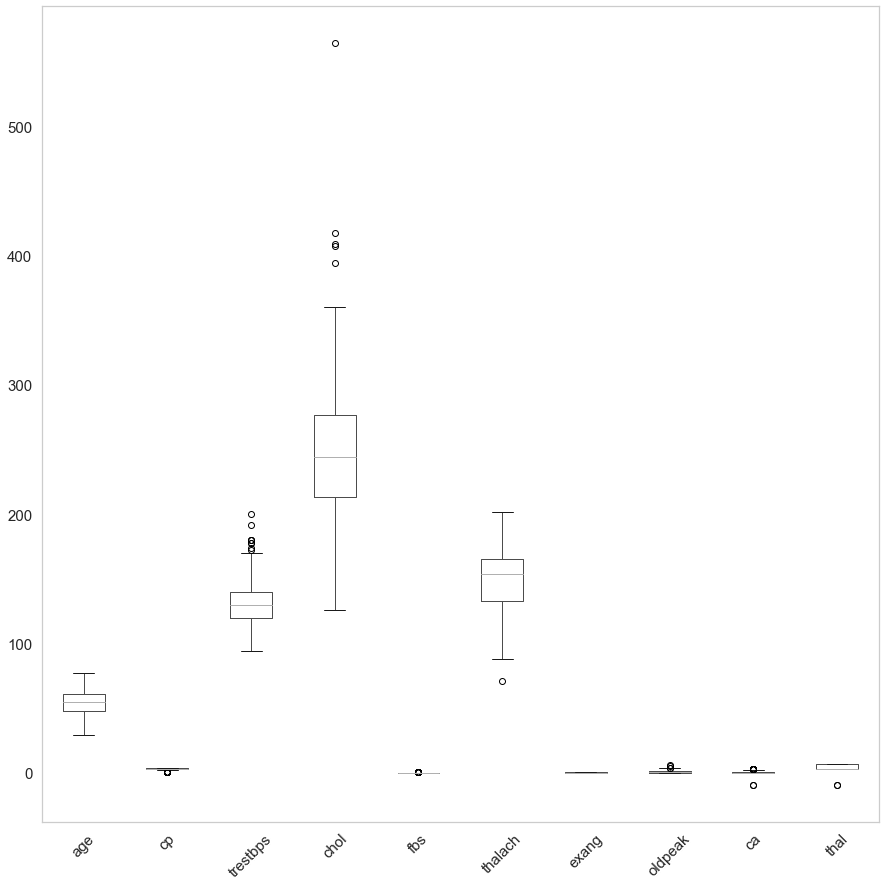

In [57]:
boxplot = data.boxplot(grid=False, rot=45,figsize=(15,15), fontsize=15) 

There aren't much outliers too, so right now I am not removing or changing any values.

In [58]:
# Dividing the whole set into the input set X and output set y. Since ID is not useful right now, I am dropping it.
#Splitting the entire data into train and test before doing any transformation.(keeping aside the test set)

X = data.drop(columns=["num"])
y = data[['num']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

We can use the following text for each five different outcomes, instead of just numbers. It's a nice way to see what the outcomes actually means rather than just seeing some random numbers.
0. No heart health issues / risk
1. Slight heart health issues / risk
2. Moderate heart health issues / risk
3. High heart health issues / risk
4. Extreme heart health issue / risk

I did not change it though in our case.

***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score


In [60]:
#Source: Greg's Classroom materials
# Instantiate learning model (k = 6)
knn_clf = KNeighborsClassifier(n_neighbors=6)  # I choose 6 because there are 5 different classes. so, at least two of the oints out of 6 will be of the same type


***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [61]:

# Fitting the model
knn_clf.fit(X_train, y_train.squeeze())

# Predicting the Test set results
knn_y_pred = knn_clf.predict(X_test)

In [62]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm


array([[39,  0,  0,  0,  0],
       [ 7,  1,  4,  0,  1],
       [ 5,  2,  1,  0,  0],
       [ 5,  1,  1,  1,  0],
       [ 3,  0,  0,  0,  0]], dtype=int64)

In [63]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)*100
print('Accuracy of our model is equal ' + str(round(knn_accuracy, 2)) + ' %.')

Accuracy of our model is equal 59.15 %.


In [64]:
knn_Benefit = calculate_cost(knn_cm)
knn_Benefit

14600.0

In [65]:
# creating list of K for KNN 

k_list = list(range(1,50,1))
# creating list of cv scores
knn_cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(knn, X_train, y_train.squeeze(), cv=10, scoring='accuracy')
    knn_cv_scores.append(knn_scores.mean())

<Figure size 432x288 with 0 Axes>

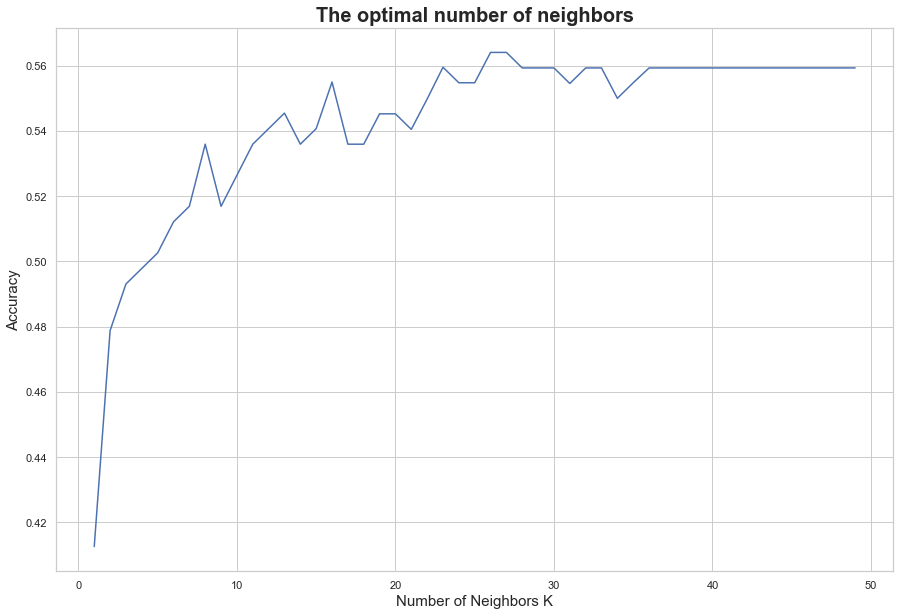

In [66]:
# Modeled from: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

def optimal_knn_value (k_list, knn_cv_scores):

    plt.figure()
    plt.figure(figsize=(15,10))
    plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
    plt.xlabel('Number of Neighbors K', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(k_list, knn_cv_scores)
    plt.show()
    
optimal_knn_value(k_list, knn_cv_scores)

In [67]:
knn_cv_scores[25]

0.5640692640692639

In [68]:
# Instantiate learning model (k = 24)
knn_final_classifier = KNeighborsClassifier(n_neighbors=24)

# Fitting the model
knn_final_classifier.fit(X_train, y_train.squeeze())

# Predicting the Test set results
knn_final_y_pred = knn_final_classifier.predict(X_test)

knn_final_cm = confusion_matrix(y_test, knn_final_y_pred)
print(knn_final_cm)
knn_final_accuracy = accuracy_score(y_test, knn_final_y_pred)*100
print('Accuracy of our model is equal ' + str(round(knn_final_accuracy, 2)) + ' %.')

[[39  0  0  0  0]
 [10  0  3  0  0]
 [ 6  0  2  0  0]
 [ 7  0  1  0  0]
 [ 3  0  0  0  0]]
Accuracy of our model is equal 57.75 %.


In [69]:
knn_final_Benefit = calculate_cost(knn_final_cm)
knn_final_Benefit

14200.0

Now, we will be plotting the ROC curve. Since we need a binary outcome so we must plot multiple curves.

In [70]:
knn_y_scores = knn_final_classifier.predict_proba(X_test)
knn_y_scores[0:10,:]

array([[0.79166667, 0.125     , 0.        , 0.04166667, 0.04166667],
       [0.625     , 0.16666667, 0.125     , 0.08333333, 0.        ],
       [0.75      , 0.125     , 0.        , 0.08333333, 0.04166667],
       [0.375     , 0.33333333, 0.125     , 0.16666667, 0.        ],
       [0.70833333, 0.125     , 0.04166667, 0.125     , 0.        ],
       [0.54166667, 0.16666667, 0.08333333, 0.125     , 0.08333333],
       [0.83333333, 0.08333333, 0.        , 0.08333333, 0.        ],
       [0.79166667, 0.08333333, 0.08333333, 0.04166667, 0.        ],
       [0.79166667, 0.125     , 0.        , 0.04166667, 0.04166667],
       [0.79166667, 0.08333333, 0.04166667, 0.08333333, 0.        ]])

In [71]:
from sklearn.preprocessing import label_binarize
y_test_binary = label_binarize(y_test, classes = [0,1,2,3,4])
print(y_test.iloc[1:10,:])
print(y_test_binary[1:10,:])

     num
277  0.0
182  0.0
8    2.0
67   0.0
273  0.0
179  0.0
101  0.0
268  1.0
57   1.0
[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from itertools import cycle
plt.style.use('ggplot')

def make_multi_roc(y_test_binary, y_scores, title, n_classes = 5):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green','brown','pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of class {0} (area = {1:0.5f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' - ROC for multi-class data')
    plt.legend(loc="lower right")
    plt.show() 

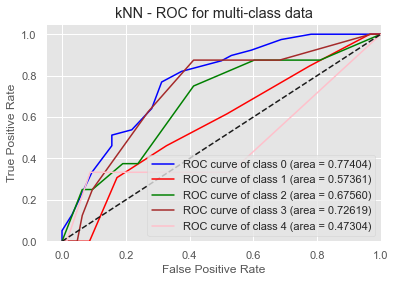

In [73]:
make_multi_roc(y_test_binary, knn_y_scores, "kNN")

Notice that the curve for class 4 is very weired. It might be because we don't have many data points whose outcome is 4. This maybe because 4 is an extreme value, and collecting such data might be difficult.

We will notice the same kind of pattern for the other two ROC curves below.

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

KNN uses all the data points in the data set to calculate the distances. So if we have a small dataset, the the calculation will be faster. And, since we have a small dataset, KNN classifier as the classifier does the execution in shorter time duration. 

In our case, there are many features. Thus KNN is not the best I suppose. KNN performs best with a low number of features. When the number of features increases, then it requires more data. When there’s more data, it creates an overfitting problem because no one knows which piece of noise will contribute to the model. KNN performs better with low dimensionality (as demonstrated by a study by Gu and Shao in 2014). 

Source: https://www.researchgate.net/publication/232406523_An_Improved_k-Nearest_Neighbor_Algorithm_for_Text_Categorization

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [74]:
#fitting logistic model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # This is the default setup

***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [75]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
lr_cm = confusion_matrix(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(lr_accuracy, 2)) + ' %.')


0.5774647887323944
              precision    recall  f1-score   support

         0.0       0.73      0.97      0.84        39
         1.0       0.22      0.15      0.18        13
         2.0       0.11      0.12      0.12         8
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         3

    accuracy                           0.58        71
   macro avg       0.21      0.25      0.23        71
weighted avg       0.45      0.58      0.51        71

[[38  1  0  0  0]
 [ 7  2  4  0  0]
 [ 2  4  1  1  0]
 [ 2  2  4  0  0]
 [ 3  0  0  0  0]]
Accuracy of our model is equal 57.75 %.


In [76]:
lr_benefit = calculate_cost(lr_cm)
lr_benefit

12400.0

In [77]:
clf_y_scores = clf.predict_proba(X_test)
clf_y_scores[0:10,:]

array([[0.55454263, 0.31655563, 0.01332567, 0.10286642, 0.01270965],
       [0.76179716, 0.13752251, 0.01960404, 0.03853116, 0.04254513],
       [0.85707014, 0.08876925, 0.00876914, 0.02488932, 0.02050215],
       [0.28330268, 0.31479062, 0.18449401, 0.1835872 , 0.03382549],
       [0.40169605, 0.34116302, 0.06041532, 0.1312604 , 0.06546521],
       [0.75743519, 0.11353925, 0.10447601, 0.01763215, 0.00691739],
       [0.85101119, 0.09389673, 0.01932744, 0.02814863, 0.00761601],
       [0.89969899, 0.07752867, 0.00325863, 0.01233666, 0.00717706],
       [0.39024575, 0.37444519, 0.01876985, 0.13467669, 0.08186252],
       [0.34473345, 0.42977019, 0.03358129, 0.15671741, 0.03519766]])

### ROC Curve

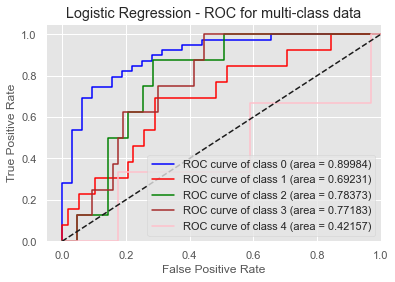

In [78]:
make_multi_roc(y_test_binary, clf_y_scores, "Logistic Regression")

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

Logistic regression doesn't require high computation power, is easy to implement. 
I did not do any feature scaling of the features, thus Logistic regression is a good classifier model for our case.

After dropping few of the columns from the dataset, we notice that all the features which we have kept are correlated with the outcome. Thus again Logistic regression is good in this situation.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [79]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=700) # I took 700, as I was getting high benefit for it.

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [80]:


#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train.squeeze())

rf_y_pred=rf_clf.predict(X_test)

In [81]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100
print('Accuracy of our model is equal ' + str(round(rf_accuracy, 2)) + ' %.')

[[37  0  1  1  0]
 [ 7  2  2  2  0]
 [ 3  3  1  1  0]
 [ 1  3  1  2  1]
 [ 2  1  0  0  0]]
Accuracy of our model is equal 59.15 %.


In [82]:
rf_benefit = calculate_cost(rf_cm)
rf_benefit

14800.0

### ROC Curve

In [83]:
rf_y_scores = rf_clf.predict_proba(X_test)
rf_y_scores[0:10,:]

array([[0.57285714, 0.31857143, 0.01857143, 0.03571429, 0.05428571],
       [0.90714286, 0.07571429, 0.00142857, 0.01285714, 0.00285714],
       [0.64571429, 0.19428571, 0.06285714, 0.08571429, 0.01142857],
       [0.13428571, 0.39857143, 0.31142857, 0.11285714, 0.04285714],
       [0.64      , 0.24142857, 0.01428571, 0.05714286, 0.04714286],
       [0.66428571, 0.10714286, 0.15571429, 0.04428571, 0.02857143],
       [0.62      , 0.16857143, 0.06142857, 0.14285714, 0.00714286],
       [0.89714286, 0.05857143, 0.00714286, 0.00428571, 0.03285714],
       [0.60142857, 0.16428571, 0.01714286, 0.15714286, 0.06      ],
       [0.69571429, 0.14142857, 0.05      , 0.11142857, 0.00142857]])

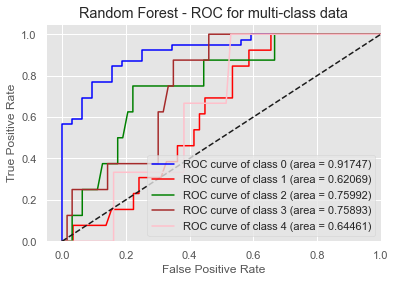

In [84]:
make_multi_roc(y_test_binary, rf_y_scores, "Random Forest")

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

It can handle large datasets efficiently.
The random forest algorithm provides a higher level of accuracy in predicting outcomes. Thus it is very helpful in strategic decision making in organizations, and is good for our dataset

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?
***

### KNN

Advantages:
1. It does not learn anything in the training period. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.
2. New data can be added seamlessly which will not impact the accuracy of the algorithm.
3. It requires only two parameters- the value of $k$ and the distance function

Disadvantages:
1. In large datasets, the cost of calculating the distance between the new point and each existing points takes a significant amount of time.
2. The KNN algorithm is not great with lots of features, it becomes difficult for the algorithm to calculate the distance.

Source: http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-knn.html

### Logistic Regression

Advantages:
1. Logistic Regression is one of the simplest machine learning algorithms and is easy to implement.
2. The coefficients for each features give inference about the importance of each feature. 

Disadvantages:
1. Logistic Regression requires a large dataset and also sufficient training examples for all the categories it needs to identify.

Source: https://iq.opengenus.org/advantages-and-disadvantages-of-logistic-regression/

### Random Forest

Advantages:
1. It can perform both regression and classification tasks.
2. It can handle large datasets efficiently.

Disadvantages:
1. The running time is high.


In [85]:

from tabulate import tabulate

m = np.array([['KNN',57.75, 14200],[ 'Logistic Regression', 57.75, 12400],[ 'Random Forest', 59.15,14800],
                      ])
headers = ['Classifiers','Accuracy' , 'Benefit' ]
# Generate the table in fancy format.
table = tabulate(m, headers, tablefmt="fancy_grid")


print(table)

╒═════════════════════╤════════════╤═══════════╕
│ Classifiers         │   Accuracy │   Benefit │
╞═════════════════════╪════════════╪═══════════╡
│ KNN                 │      57.75 │     14200 │
├─────────────────────┼────────────┼───────────┤
│ Logistic Regression │      57.75 │     12400 │
├─────────────────────┼────────────┼───────────┤
│ Random Forest       │      59.15 │     14800 │
╘═════════════════════╧════════════╧═══════════╛


Even though KNN and Logistic regression arehave same accuracy, the benefit of KNN is higher that Logistic regression. Thus out of the two KNN is a better classifier for our dataset.

***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

We want to maximize the benefit as much as possible for our given problem. As we can see from the above table, Random forest has highest accuracy and Benefit value, so I will choose Random forest as the best out of all the three classifiers. 

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

The problem given to us for this homework was a multi category classifying problems. Using the dataset, we had to come up with an algorithm which helps us predict the severity of heart disease (either 0,1,2,3 or 4) for a given person given certain features. So, we had to investigate which model we should use. I choose three classifiers and evaluated their efficiencies in classification based on the net benefit metric.

For finding the efficiency, we created a  cost matrix which is used to calculate the cost of each classifier.

In the case of KNN, we had to find the best $k$ value for which we get maximum accuracy. This enabled us to tune the classifier to achieve good performance. 

For Random Forest, I had to run the code for several values which indicates the number of trees in a forest, and chose the one which gives higher accuracy and net benefits.

Out of the three classifiers, we then selected the one which gave us the highest benefit and accuracy. This assignment helped us to learn how to select and evaluate the best classifier depending on the outcomes we need.


***
### END-OF-SUBMISSION
***